# Error Analysis


Residual analysis for GBM predictions by hour and day-of-week.

In [8]:
import sys, subprocess
from pathlib import Path

print("Python:", sys.executable)
repo_root = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
subprocess.run(["pip", "install", "-e", str(repo_root)], check=True)


Python: /Users/pratik_n/Downloads/gridpulse/.venv/bin/python
Obtaining file:///Users/pratik_n/Downloads/gridpulse
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for gridpulse (pyproject.toml): started
  Building editable for gridpulse (pyproject.toml): finished with status 'done'
  Created wheel for gridpulse: filename=gridpulse-0.1.0-0.editable-py3-none-any.whl size=6066 sha256=bc3d4132d77209fde90144bb876f328913a8bb79dd94de93bfc5030d1a2168a2
  Stored in directory: /private/var/folders/pk/ksqc41pj60q3589gfwhqz5tw0000gn/T/pip-

CompletedProcess(args=['pip', 'install', '-e', '/Users/pratik_n/Downloads/gridpulse'], returncode=0)

In [9]:
import pandas as pd
import pickle
from pathlib import Path

splits_dir = Path(repo_root) / "data" / "processed" / "splits"
train = pd.read_parquet(splits_dir / "train.parquet")
val = pd.read_parquet(splits_dir / "val.parquet")
test = pd.read_parquet(splits_dir / "test.parquet")

model_path = Path(repo_root) / "artifacts" / "models" / "gbm_lightgbm_load_mw.pkl"
bundle = pickle.load(open(model_path, "rb"))
model = bundle["model"]
feat_cols = bundle["feature_cols"]


/Users/pratik_n/Downloads/gridpulse/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Mean Residual by Hour'}, xlabel='hour'>

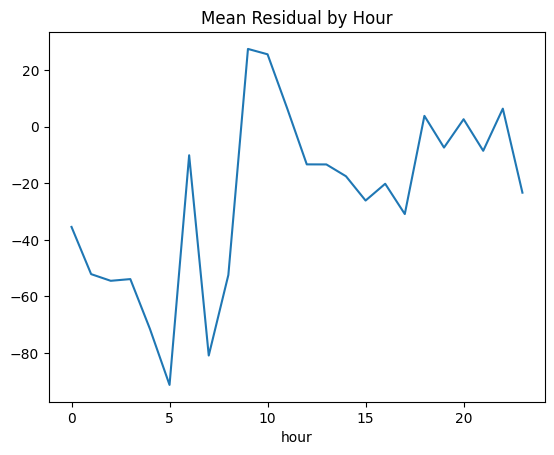

In [10]:
import pandas as pd

X = test[feat_cols].to_numpy()
y = test["load_mw"].to_numpy()
pred = model.predict(X)

err = test[["timestamp"]].copy()
err["resid"] = y - pred
err["hour"] = pd.to_datetime(err["timestamp"]).dt.hour
err["dow"] = pd.to_datetime(err["timestamp"]).dt.dayofweek

err.groupby("hour")["resid"].mean().plot(title="Mean Residual by Hour")
